<a href="https://colab.research.google.com/github/akaver/NLP2019/blob/master/Lab04_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! wget http://www.phon.ioc.ee/~tanela/pynini-2.0.0-cp36-cp36m-manylinux1_x86_64.whl

--2019-02-19 11:24:37--  http://www.phon.ioc.ee/~tanela/pynini-2.0.0-cp36-cp36m-manylinux1_x86_64.whl
Resolving www.phon.ioc.ee (www.phon.ioc.ee)... 193.40.251.126
Connecting to www.phon.ioc.ee (www.phon.ioc.ee)|193.40.251.126|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://phon.ioc.ee/~tanela/pynini-2.0.0-cp36-cp36m-manylinux1_x86_64.whl [following]
--2019-02-19 11:24:37--  https://phon.ioc.ee/~tanela/pynini-2.0.0-cp36-cp36m-manylinux1_x86_64.whl
Resolving phon.ioc.ee (phon.ioc.ee)... 193.40.251.126
Connecting to phon.ioc.ee (phon.ioc.ee)|193.40.251.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52740954 (50M)
Saving to: ‘pynini-2.0.0-cp36-cp36m-manylinux1_x86_64.whl’

pynini-2.0.0-cp36-c 100%[===================>]  50.30M  2.68MB/s    in 38s     

2019-02-19 11:25:17 (1.31 MB/s) - ‘pynini-2.0.0-cp36-cp36m-manylinux1_x86_64.whl’ saved [52740954/52740954]



In [0]:
! pip install pynini-2.0.0-cp36-cp36m-manylinux1_x86_64.whl

Processing ./pynini-2.0.0-cp36-cp36m-manylinux1_x86_64.whl


In [0]:
import pynini as pn


In [0]:
zero = pn.a("0")
one = pn.a("1")
bit = zero | one
first = (zero + zero.star + bit.star + one + one + one + one.ques).optimize()

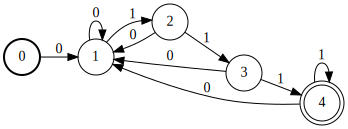

In [0]:
first

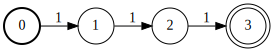

In [0]:
ones_3 = (one + one + one).optimize()
ones_3

Questions:
  * What language does `first` accept (describe in plain English)? 
  * Why are 0 and 1 in double quotes?
  
Can you find a more concise way of defining first’s language? Add it to the notebook as a variable `second`.

*NB!* When using the `closure()` method, keep in mind that it is *destructive*! I.e., x.closure() results in x being assigned the result of the closure() method. To apply closure() non-destructively, use pn.closure(fst). And, the aliases x.plus, x.star and x.ques are non-destructive.

In [0]:
# second = TODO

Test whether the FSTs `first` and `second` accept the same language:

In [0]:
# pn.difference(first, second)

Now let's try something a bit more difficult. Write FSAs for the following languages:

  * triplets: Binary strings where 1 only occurs in groups of three or more, such as 000000 and
0011100001110001111111.
  * not_pillars: All binary strings except for even-length strings of 1’s: `<epsilon>`, 11, 1111, 111111,
11111111, . . . (These correspond to binary numbers of the form 22k − 1 written in standard
form.) Some strings that are in this language are 0, 1, 000011, 111, 0101, 011110.
  * oddlets: Binary strings where 1’s only appear in groups of odd length. Careful testing this one!
(Note that 0000 is in this language, because 1’s don’t appear in it at all.)

In [0]:
# triplets = 
# not_pillars =
# oddlets =

## FSTs

Now let's move on to FSTs. Let's first define the helper function that was introduced last week:

In [0]:
def top10_paths(fst):
    return [p[1] for p in pn.shortestpath(fst, nshortest=10).paths()]

Now, look at the following FST:

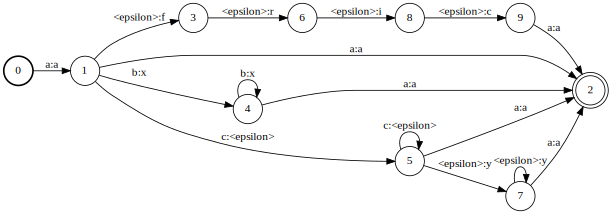

In [0]:
cross = pn.a("a")  + (pn.t("b", "x").star | pn.t(pn.a("c").plus, pn.a("y").star) | pn.t("", "fric")) + pn.a("a")
cross.optimize()
cross


Note that "" (e.g., in `pn.t("", "fric")`) denotes the empty string `<epsilon>`. 

Answer the following questions:
  * What is the input language of this relation (answer with an ordinary regexp)?
  * Give inputs that are mapped by `cross` to 0 outputs, 1 output, 2 outputs, and more than 2
outputs.
  * How would you describe the cross relation in English?

In [0]:
# Example answer: input with exactly one output:
top10_paths("aba" * cross)

['axa']

## cdrewrite

As we learned last wee, one of the most useful pynini's FST operations is the context-dependent rewrite function. Let's look at it more closely.

```
cdrewrite(t, left, right, any, direction="ltr", mode="obl")
```
Here:
  * T : any FST
  * left, right : unweighted FSAs describing the left and right contexts in which T should be applied. They may contain the special symbols "[BOS]" and "[EOS]", respectively. (These symbols are only to be used when describing contexts, as in these arguments to CDRewrite, which interprets them specially. They do not appear in the symbol table.)
  * any : a minimized FSA for Σ∗, where Σ is the alphabet of input and output characters. The FST produced by cdrewrite will only allow input or output strings that are in `any`, so be carefu!
  * dir : the direction of replacement.
    - ’sim’ specifies “simultaneous transduction”: Left and Right are matched against the original input string. So all the substrings to replace are identified first, and then they are all transduced in parallel.
    -  ’ltr’ says to perform replacements “in left-to-right order.” A substring should be replaced if `left` matches its left context after any replacements to the left have been done, and `right` matches its right context before any replacements to the right have been done.
    - ’rtl’ uses “right-to-left” order, the other way around.
  * mode : how aggressive to be in replacement?
    - ’obl’ (“obligatory,” like -> in XFST) says that the unreplaced regions may not contain any more replaceable substrings, as illustrated above. That is, they may not contain a substring that matches the input language of T and which falls between substrings that match `left` and `right`.
    - ’opt’ (“optional”) says it’s okay to leave replaceable substrings unreplaced. Since the rewrite transducer has the freedom to replace them or not, it typically has even more outputs per input.

Also remember that if you want to require that the maximal substring to the left matches Left, then start Left with the special symbol [BOS], which can only match at the beginning of the string. Similarly for Right and [EOS] (end of string).

Let's define a FST bitflip that, given a string of digits, changes every 1 to 0 and every 0 to 1. Let's first do it without using cdrewrite:

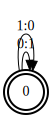

In [0]:
bitflip0 = (pn.t("0", "1") | pn.t("1", "0")).star.optimize()
bitflip0

In [0]:
top10_paths("101001" * bitflip0)

['010110']

In [0]:
top10_paths("101777001" * bitflip0)

[]

The `bitflip0` transducer can flip bitstrings, but it cannot handle strings that contain other digits. Let's fix it:

In [0]:
bitflip1 = (pn.t("0", "1") | pn.t("1", "0") | pn.u(*"2345678")).star.optimize()
top10_paths("101777001" * bitflip1)

['010777110']

Let's now see how to do it with `cdrewrite`:

In [0]:
digits = pn.u(*"0123456789").star
bitflip2 = pn.cdrewrite(pn.t("0", "1") | pn.t("1", "0"), "", "",  digits).optimize()


In [0]:
top10_paths("101777001" * bitflip2)

['010777110']

Now, let's create an FST that puts spaces between the bits in the bitstring:

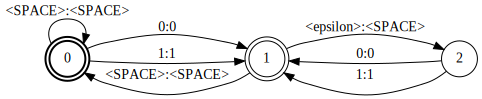

In [0]:
bit = pn.u(*"01")
bit_space_star = (bit | pn.a(" ")).star
splitter = pn.cdrewrite(pn.t("", " ") , bit, bit, bit_space_star).optimize()
splitter

In [0]:
top10_paths("10011" * splitter)

['1 0 0 1 1']

Exercise: 

Now, create a FST `split_variants` that splits a bitstring into all possible split/non-split combinations. E.g., for a bitstring "100" it should result in ["100", "1 00", "10 0", "1 0 0"]. 
Hint: use the optional arguments of `cdrewrite`.

In [0]:
# split_variants = ...

Now let's do something more practical. Your task is to create a find all numeric tokens in (Estonian) text, and surround them with tags `<number>` `</number>`. You can limit yourself to main lowercase Estonian characters.

E.g. `top10_paths("mul on 21 õuna" * replace_numbers)` should result in `["mul on <number>21</number> õuna"]`


In [0]:
chars_star = pn.u("*abcdefghijklmnoprsšzžtuvõäöüxy ,.!?-<>/=").star
#replace_numbers = 

Now, modify the FST so that numbers ending with "." will be surrponded with `<number ord=true>...</number>`.

E.g. `top10_paths("käes on 21. sajand" * replace_numbers)` should result in `["käes on <number ord=true>21.</number> sajand"]`

Next, modify the FST so that `replace_numbers` also tries to predict the inflection from the surrounding words. For example, modify it so that if the next word ends with "st" (e.g. "aastast"), a attribute "infl=el" is added to the tags, e.g.:

E.g. `top10_paths("1990. aastast alates" * replace_numbers)` should result in `["<number ord=true infl=el>1990.</number> aastast alates"]`